<a href="https://colab.research.google.com/github/skbhere/Foot-or-not-CNN-Binary-classifier-/blob/master/Foot_or_Not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import pandas as pd
import numpy as np

In [3]:
print(len(os.listdir('/content/drive/My Drive/data/foot or not/0foot/')))
print(len(os.listdir('/content/drive/My Drive/data/foot or not/not foot/')))

673
673


In [7]:
to_create = [
    '/content/drive/My Drive/data/foot or not/training',
    '/content/drive/My Drive/data/foot or not/testing',
    '/content/drive/My Drive/data/foot or not/training/0foot',
    '/content/drive/My Drive/data/foot or not/training/not_foot',
    '/content/drive/My Drive/data/foot or not/testing/0foot',
    '/content/drive/My Drive/data/foot or not/testing/not_foot'
]
for directory in to_create:
    try:
        os.mkdir(directory)
        print(directory, 'created')
    except:
        print(directory, 'failed')

/content/drive/My Drive/data/foot or not/training created
/content/drive/My Drive/data/foot or not/testing created
/content/drive/My Drive/data/foot or not/training/0foot created
/content/drive/My Drive/data/foot or not/training/not_foot created
/content/drive/My Drive/data/foot or not/testing/0foot created
/content/drive/My Drive/data/foot or not/testing/not_foot created


In [8]:

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    all_files = []
    
    for file_name in os.listdir(SOURCE):
        file_path = SOURCE + file_name

        if os.path.getsize(file_path):
            all_files.append(file_name)
        else:
            print('{} is zero length, so ignoring'.format(file_name))
    
    n_files = len(all_files)
    split_point = int(n_files * SPLIT_SIZE)
    
    shuffled = random.sample(all_files, n_files)
    
    train_set = shuffled[:split_point]
    test_set = shuffled[split_point:]
    
    for file_name in train_set:
        copyfile(SOURCE + file_name, TRAINING + file_name)
        
    for file_name in test_set:
        copyfile(SOURCE + file_name, TESTING + file_name)

FOOT_SOURCE_DIR = r"/content/drive/My Drive/data/foot or not/0foot/"
TRAINING_FOOT_DIR = r"/content/drive/My Drive/data/foot or not/training/0foot/"
TESTING_FOOT_DIR = r"/content/drive/My Drive/data/foot or not/testing/0foot/"
NOT_FOOT_SOURCE_DIR = r"/content/drive/My Drive/data/foot or not/not foot/"
TRAINING_NOT_FOOT_DIR = r"/content/drive/My Drive/data/foot or not/training/not_foot/"
TESTING_NOT_FOOT_DIR = r"/content/drive/My Drive/data/foot or not/testing/not_foot/"

split_size = .9
split_data(FOOT_SOURCE_DIR, TRAINING_FOOT_DIR, TESTING_FOOT_DIR, split_size)
split_data(NOT_FOOT_SOURCE_DIR, TRAINING_NOT_FOOT_DIR, TESTING_NOT_FOOT_DIR, split_size)

In [ ]:
print(len(os.listdir('/content/drive/My Drive/data/foot or not/training/0foot/')))
print(len(os.listdir('/content/drive/My Drive/data/foot or not/training/not_foot/')))
print(len(os.listdir('/content/drive/My Drive/data/foot or not/testing/0foot/')))
print(len(os.listdir('/content/drive/My Drive/data/foot or not/testing/not_foot/')))

605
605
68
68


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer="Adamax", loss='binary_crossentropy', metrics=['acc'])


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 35, 35, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [11]:
TRAINING_DIR = '/content/drive/My Drive/data/foot or not/training/'
train_datagen = ImageDataGenerator(
    rescale=1 / 255,
    rotation_range=40,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=64,
    class_mode='binary',
    target_size=(150, 150)
)

VALIDATION_DIR = '/content/drive/My Drive/data/foot or not/testing/'
validation_datagen = ImageDataGenerator(
    rescale=1 / 255,
    rotation_range=40,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    fill_mode='nearest'

)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=64,
    class_mode='binary',
    target_size=(150, 150)
)

Found 267 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [ ]:
# import warnings
# warnings.filterwarnings('ignore')
# print('warnings ignored')

warnings ignored


In [12]:
history = model.fit_generator(
    train_generator,
    epochs=50,
    verbose=1,
    validation_data=validation_generator
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
5/5 [==============================] - 7s 1s/step - loss: 1.9098 - acc: 0.6142 - val_loss: 0.9182 - val_acc: 0.2308
Epoch 2/50
5/5 [==============================] - 6s 1s/step - loss: 0.7165 - acc: 0.4644 - val_loss: 0.5520 - val_acc: 0.7692
Epoch 3/50
5/5 [==============================] - 6s 1s/step - loss: 0.6064 - acc: 0.7453 - val_loss: 0.5344 - val_acc: 0.7692
Epoch 4/50
5/5 [==============================] - 6s 1s/step - loss: 0.5537 - acc: 0.7453 - val_loss: 0.5348 - val_acc: 0.7692
Epoch 5/50
5/5 [==============================] - 6s 1s/step - loss: 0.5017 - acc: 0.7416 - val_loss: 0.5982 - val_acc: 0.8077
Epoch 6/50
5/5 [==============================] - 6s 1s/step - loss: 0.4353 - acc: 0.7640 - val_loss: 0.6591 - val_acc: 0.7308
Epoch 7/50
5/5 [==============================] - 6s 1s/step - loss: 0.3915 - acc: 0.7828 - val_loss: 0.6809 - val_acc: 0.7308
Epoch 8/50
5/5 [===================

Text(0.5, 1.0, 'Training and validation loss')

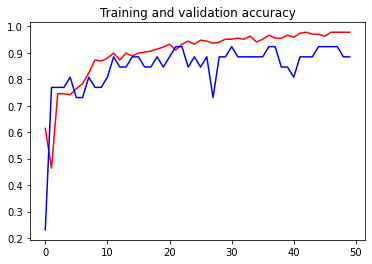

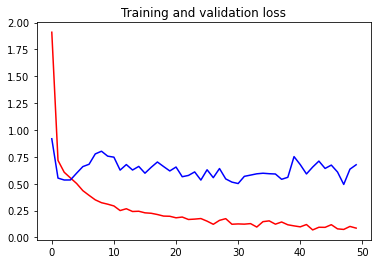

In [13]:

# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b' )
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r' )
plt.plot(epochs, val_loss, 'b')


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [ ]:

# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    # predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0][0])
    if classes[0][0]>0.5:
        print(fn + " is Foot")
    else:
        print(fn + " is not a Foot")

Saving Penguins.jpg to Penguins.jpg
1.0
Penguins.jpg is Foot


In [22]:
from keras.models import model_from_json


In [16]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")


Saved model to disk


In [17]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [21]:
# evaluate loaded model on test data
loaded_model.compile(optimizer="Adamax", loss='binary_crossentropy', metrics=['acc'])

In [23]:

# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    # predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = loaded_model.predict(images, batch_size=10)
    print(classes[0][0])
    if classes[0][0]>0.5:
        print(fn + " is Foot")
    else:
        print(fn + " is not a Foot")

Saving Koala.jpg to Koala.jpg
0.0
Koala.jpg is not a Foot
